In [2]:
# Add the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_path = '/content/drive/MyDrive/Recommendation System Project/sample30.csv'

In [5]:
# Start reading the data set
review_data = pd.read_csv(dataset_path,encoding='latin-1')

In [ ]:
# Lets have a look on thje data set
review_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


##  1.  Exploratory Data Analysis

---

In [ ]:
# Lets further have look at the statistics of the data set
review_data.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Lets have a look at the data types of the data set
review_data.dtypes

,0
id,object
brand,object
categories,object
manufacturer,object
name,object
reviews_date,object
reviews_didPurchase,object
reviews_doRecommend,object
reviews_rating,int64
reviews_text,object


In [ ]:
# Get the columns of the data set
review_data.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
# How many Categories are there in the data set
review_data['categories'].nunique()

270

In [ ]:
# distribution between the categories
review_data['categories'].value_counts().sort_values(ascending=False)



,count
categories,
"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",8545
"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",3325
"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",2039
"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",1186
"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",1143
...,...
"Food,Packaged Foods,Frozen Foods,Frozen Meals,Food & Beverage,Frozen Pizza,Food & Beverage Ways To Shop,Gluten Free,Special Diets,Pizza,Arts, Crafts & Sewing,Crafting,Craft Supplies,Adhesives,Art Glues & Pastes,#15454 in",1
"Household Chemicals,Laundry,Bleach Products,Household Essentials,Laundry Care,Health & Household,Household Supplies,Bleach,Featured Brands,Home And Storage & Org,Clorox,Grocery",1
"Home,Home Appliances,Air Purifiers,Home Improvement,Heating, Cooling, & Air Quality,Air Quality,Heating,Cooling,germguardian,HEPA Air Purifiers,Asthma Medicine,Kitchen & Dining Features,Air,Housewares,Water Filters",1


### Now we would like to explore the most frequesnt terms used in categories. Since the data in each category cell is collection of many items we need to perform some pre processing before finding the most frequent words


In [ ]:
# Lower case all the text in the review text
review_data['categoriescategory_freq'] = review_data['categories'].str.lower()

In [ ]:
# remove the stop words
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

stop = stopwords.words('english')
review_data['categoriescategory_freq'] = review_data['categoriescategory_freq'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove the special characters
review_data['categoriescategory_freq'] = review_data['categoriescategory_freq'].apply(lambda x: re.sub(r'[^\w\s]','',x))



In [ ]:
review_data['categoriescategory_freq']

,categoriescategory_freq
0,movies music booksmusicrbmovies tvmovie bundles collectionscds vinylrap hiphopbassmusic cd vinylraphiphopmainstream rappop rap
1,foodpackaged foodssnackscrackerssnacks cookies chipsrice cakescakes
2,foodpackaged foodssnackscrackerssnacks cookies chipsrice cakescakes
3,personal caremedicine cabinetlubricantspermicidehealthsexual wellnesslubricants
4,personal caremedicine cabinetlubricantspermicidehealthsexual wellnesslubricants
...,...
29995,beautyhair careshampoo conditionerholiday shopchristmasfeatured brandshealth beautylorealpersonal carehair treatmentsconditioner
29996,beautyhair careshampoo conditionerholiday shopchristmasfeatured brandshealth beautylorealpersonal carehair treatmentsconditioner
29997,beautyhair careshampoo conditionerholiday shopchristmasfeatured brandshealth beautylorealpersonal carehair treatmentsconditioner
29998,beautyhair careshampoo conditionerholiday shopchristmasfeatured brandshealth beautylorealpersonal carehair treatmentsconditioner


In [ ]:
# Top 10 words used in the categories and plot them in the bar chart
freq = pd.Series(' '.join(review_data['categoriescategory_freq']).split()).value_counts()[:20]
freq

,count
movies,12608
tv,12200
household,11321
householdhousehold,11218
supplieshousehold,11107
storage,11077
brandshome,11065
essentialscleaning,11043
cleanershealth,10948
restockfood,10932


#### Observation:
---
So we get that few of the most used categories are movies and TV shows,household supplies,cleaning supplies, groceries.

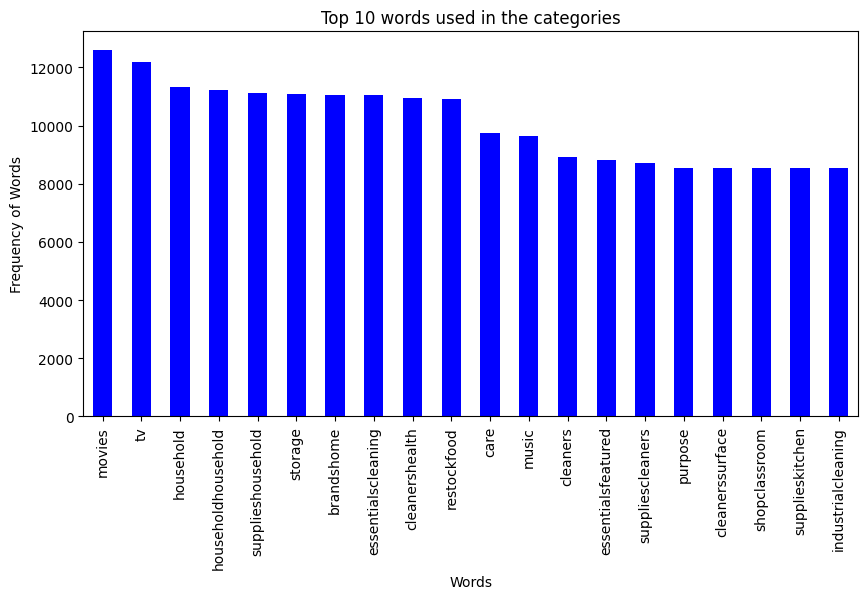

In [ ]:
# Plot the top 10 words
freq.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Top 10 words used in the categories")
plt.ylabel('Frequency of Words')
plt.xlabel('Words')
plt.show()

In [ ]:
# Brands in the data set
review_data['brand'].nunique()


214

In [ ]:
# Lets have a look at the distribution of the brands
review_data['brand'].value_counts()


,count
brand,
Clorox,10585
Warner Home Video,3325
Disney,1200
L'oreal Paris,1186
FOX,887
...,...
Herr's,1
Southern Enterprises,1
Stonyfield,1


<Axes: xlabel='brand'>

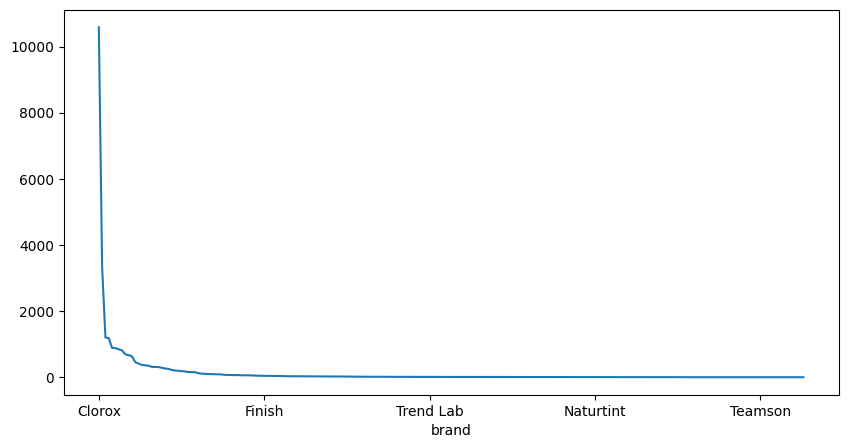

In [ ]:
# Plot the distribution of the brands in line plot
review_data['brand'].value_counts().plot(kind='line', figsize=(10, 5))


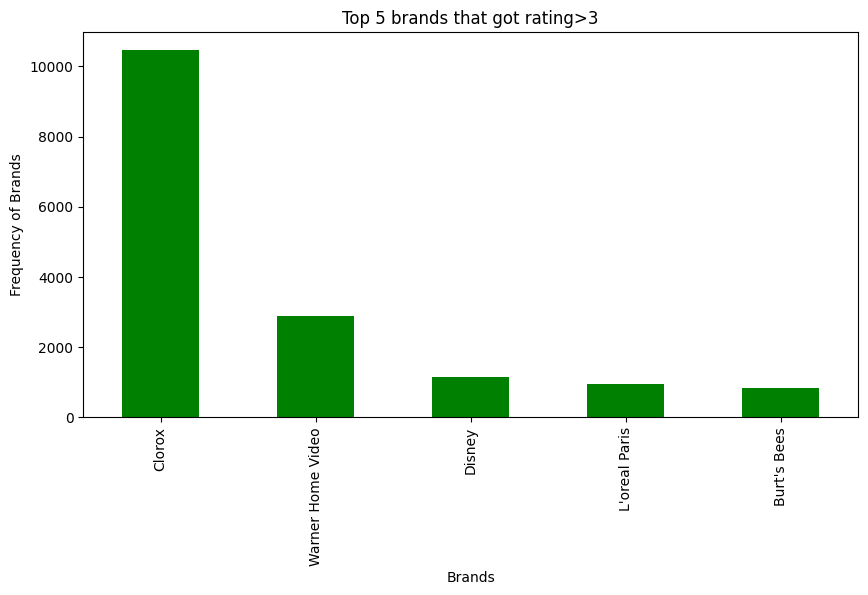

In [ ]:
# top 5 brands that got rating>3
# Lets first filter the data set where the rating is greater than 3
# Then get the top 5 brands
# Then plot the data

top_5_brands = review_data[review_data['reviews_rating'] > 3]['brand'].value_counts().head(5)
top_5_brands.plot(kind='bar', figsize=(10, 5), color='green')
plt.title("Top 5 brands that got rating>3")
plt.ylabel('Frequency of Brands')
plt.xlabel('Brands')
plt.show()



Text(0.5, 0, 'Brands')

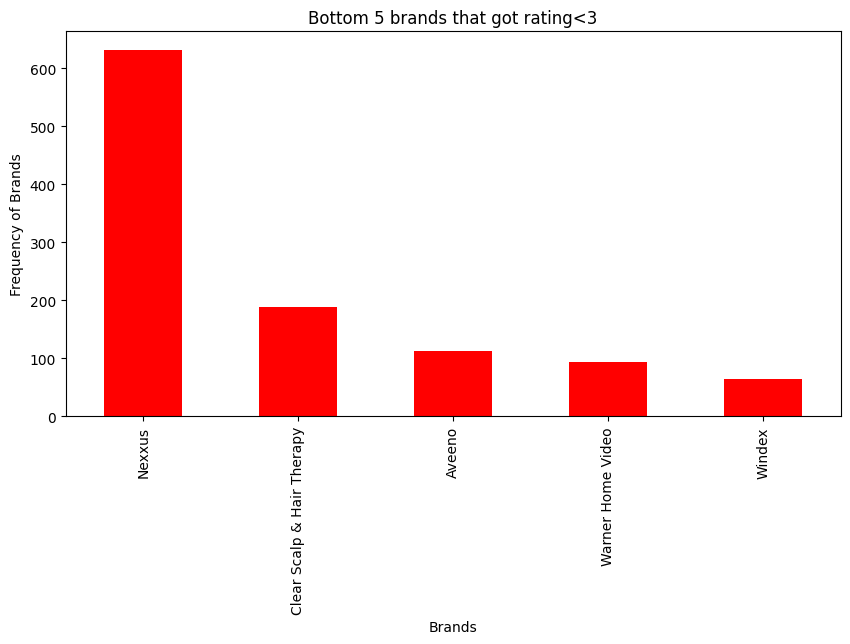

In [ ]:
# Also get the top 5 brands that receive <3 reviews and plot them
bootom_5_brands = review_data[review_data['reviews_rating'] < 3]['brand'].value_counts().head(5)
bootom_5_brands.plot(kind='bar', figsize=(10, 5), color='red')
plt.title("Bottom 5 brands that got rating<3")
plt.ylabel('Frequency of Brands')
plt.xlabel('Brands')

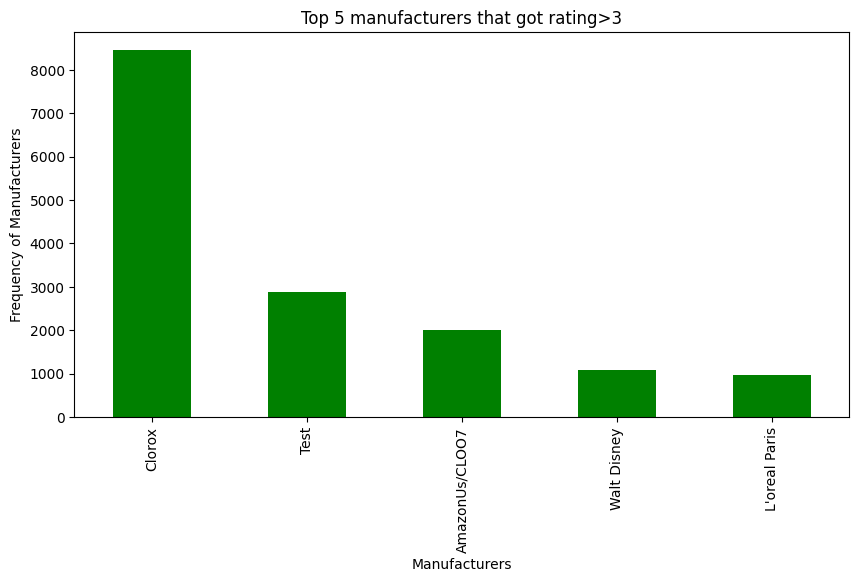

In [ ]:
# Also nice to visualize the top 5 manufacturers that got rating>3
top_5_manufacturers = review_data[review_data['reviews_rating'] > 3]['manufacturer'].value_counts().head(5)
top_5_manufacturers.plot(kind='bar', figsize=(10, 5), color='green')
plt.title("Top 5 manufacturers that got rating>3")
plt.ylabel('Frequency of Manufacturers')
plt.xlabel('Manufacturers')
plt.show()

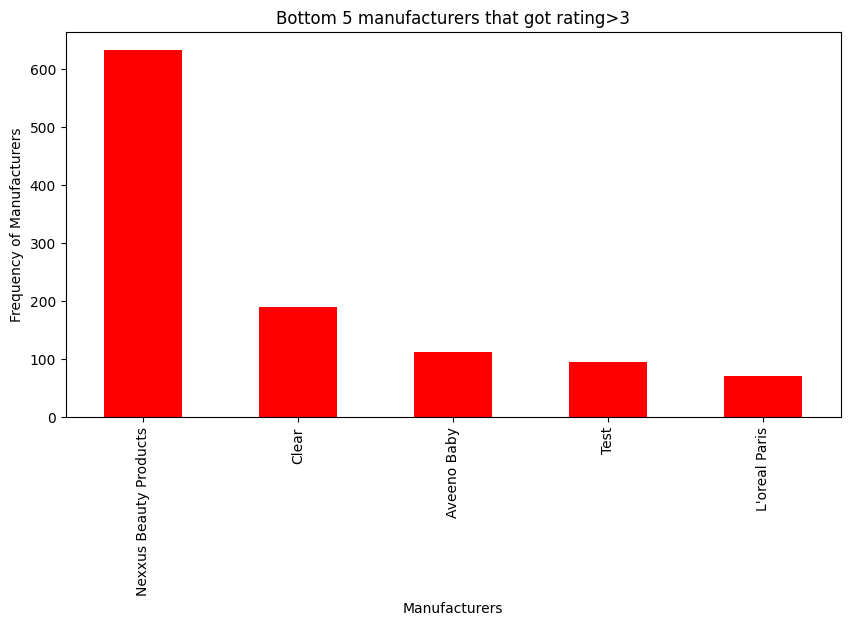

In [ ]:
# Bottom 5 manufacturers that got rating<3

bottom_5_manufacturers = review_data[review_data['reviews_rating'] < 3]['manufacturer'].value_counts().head(5)
bottom_5_manufacturers.plot(kind='bar', figsize=(10, 5), color='red')
plt.title("Bottom 5 manufacturers that got rating>3")
plt.ylabel('Frequency of Manufacturers')
plt.xlabel('Manufacturers')
plt.show()

In [ ]:
# Lets have a look in the distribution of  reviews_didPurchase
review_data['reviews_didPurchase'].value_counts()

,count
reviews_didPurchase,
False,14498
True,1434


In [ ]:
# Lets get the data for the reviews_didPurchase = True
review_data[review_data['reviews_didPurchase'] == True]['reviews_rating'].value_counts()/review_data[review_data['reviews_didPurchase'] == True]['reviews_rating'].count()



,count
reviews_rating,
5,0.756625
4,0.135983
3,0.050907
1,0.036262
2,0.020223


#### Observation :
----
It indicates that only 1434 reviews are provided after the customer purchased the product.14498 reviews were given even if the product was not purchased.

It also indicates customers generally provide positive feedback when they purchased the product, almost 90% reviewed 4 or 5


In [ ]:
# Percenatge of null values in the data set
review_data.isnull().sum()/len(review_data)*100


,0
id,0.000000
brand,0.000000
categories,0.000000
manufacturer,0.470000
name,0.000000
reviews_date,0.153333
reviews_didPurchase,46.893333
reviews_doRecommend,8.566667
reviews_rating,0.000000
reviews_text,0.000000


#### Observation:
---
we see user demogrpahic data like reviews_userProvince  and reviews_username are significantly missing in the data set. So later we can drop these 2 columns for our model building activity.

Also we see almost 47% of reviews_didPurchase  are null. We will replace the null values as NA

In [ ]:
# Replace null values of column reviews_didPurchase with 'NA'
review_data['reviews_didPurchase'].fillna('NA', inplace=True)


In [ ]:
# Percenatge of null values in the data set
review_data.isnull().sum()/len(review_data)*100

,0
id,0.000000
brand,0.000000
categories,0.000000
manufacturer,0.470000
name,0.000000
reviews_date,0.153333
reviews_didPurchase,0.000000
reviews_doRecommend,8.566667
reviews_rating,0.000000
reviews_text,0.000000


In [ ]:
# Lets also have a look on how many unique reviews are there in the data set
review_data['id'].nunique()/len(review_data)*100

0.9033333333333334

In [ ]:
# Distribution of ID in review
review_data['id'].value_counts()


,count
id,
AVpf3VOfilAPnD_xjpun,8545
AVpfPaoqLJeJML435Xk9,3325
AVpfJP1C1cnluZ0-e3Xy,2039
AVpfW8y_LJeJML437ySW,1186
AVpfRTh1ilAPnD_xYic2,1143
...,...
AV2Avn5dGV-KLJ3alTjq,1
AV2BOOWS-jtxr-f39GPS,1
AVpe4Bq81cnluZ0-YwTN,1


#### Observation:
---

271 unique values in 30,000 total reviews possible as few IDs like AVpf3VOfilAPnD_xjpun reviewed 8545 times, AVpfPaoqLJeJML435Xk9 reviewed more than 3K and so.

In [ ]:
# Lets have a look at the distribution of the reviews_didPurchase
print(f"reviews_didPurchase distribution \n{review_data['reviews_didPurchase'].value_counts()} ")
print('--'*80)
print(f"reviews_doRecommend distribution \n{review_data['reviews_doRecommend'].value_counts()} ")
print('--'*80)
print(f"reviews_rating distribution \n{review_data['reviews_rating'].value_counts()} ")
print('--'*80)
print(f"user_sentiment distribution \n{review_data['user_sentiment'].value_counts()} ")

reviews_didPurchase distribution 
reviews_didPurchase
False    14498
NA       14068
True      1434
Name: count, dtype: int64 
----------------------------------------------------------------------------------------------------------------------------------------------------------------
reviews_doRecommend distribution 
reviews_doRecommend
True     25880
False     1550
Name: count, dtype: int64 
----------------------------------------------------------------------------------------------------------------------------------------------------------------
reviews_rating distribution 
reviews_rating
5    20831
4     6020
1     1384
3     1345
2      420
Name: count, dtype: int64 
----------------------------------------------------------------------------------------------------------------------------------------------------------------
user_sentiment distribution 
user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64 


#### Observations
----
Class imbalance with sentiment as 26K+ is positive out of 30K

Class imbalance also is observed with the field reviews_doRecommend and to some extent with reviews_didPurchase distribution

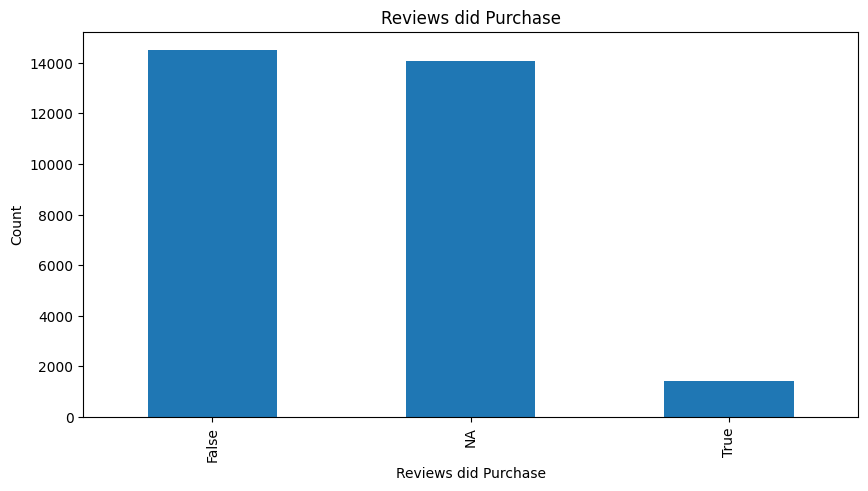

In [ ]:
# Count Ratings provided by customers who have purchased the product, reviews_didPurchase = true
review_data['reviews_didPurchase'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Reviews did Purchase')
plt.xlabel('Reviews did Purchase')
plt.ylabel('Count')
plt.show()



#### Observation:
---
A major class imbalance issue, as the reviewers who purchased the product is highly outnumbered by reviewers who either did not purchase or the data set has no information whether reviewer purchased or not


In [ ]:
# Now a bit more exploration on reviews_doRecommend, lets have check how many customers have recommended the product
# But first we should replace the null values with 'NA'
review_data['reviews_doRecommend'].fillna('NA', inplace=True)


<Axes: xlabel='reviews_doRecommend'>

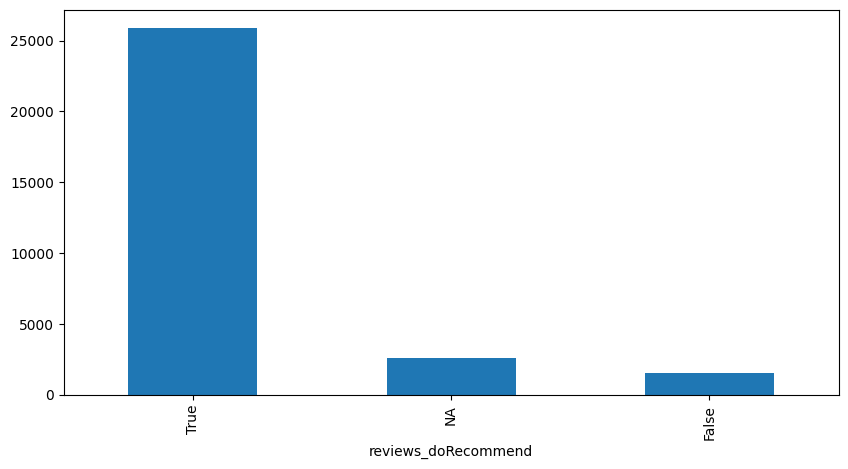

In [ ]:
# Now a bit more exploration on reviews_doRecommend, lets have check how many customers have recommended the product
review_data['reviews_doRecommend'].value_counts().plot(kind='bar', figsize=(10, 5))


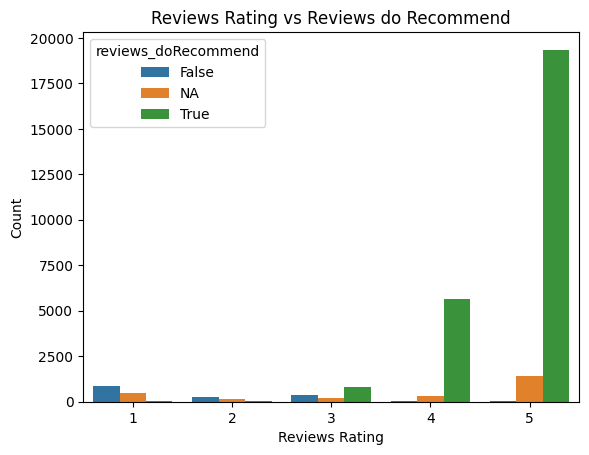

In [ ]:
# Also have a check in the relation between reviews_doRecommend and reviews_rating
sns.countplot(x='reviews_rating', hue='reviews_doRecommend', data=review_data)
plt.title('Reviews Rating vs Reviews do Recommend')
plt.xlabel('Reviews Rating')
plt.ylabel('Count')
plt.show()

#### Observation:
---
Although negligible but we can see there are few poor reviews with 1,2 and to some extent 3 but customer has recommended the product.This is difficult to comprehend.


In [ ]:
# Find the count of reviews_doRecommend = True for rating 1, 2
lowrated_recommended = review_data[(review_data['reviews_doRecommend'] == True) & (review_data['reviews_rating'].isin([1, 2]))][['reviews_rating', 'reviews_text']]
lowrated_recommended


,reviews_rating,reviews_text
66,2,GreatGreatmefeels great smells great succulent took away dry skin silky smooth enriching
1302,2,"I like the results, except I think it's causing my skin to itch like crazy... I'm trying to find out other products you have that might not do that.."
1378,1,Hi i love this line used since high school. I just bought a new set and it smells different. Should I be concerned or was their a change in suave sleek
1537,1,Movie is fine... But does not include Ultraviolet. Called customer service and I now have to wait for BB to reorder the dvd and I then have to go to UPS to return this copy. This $5 dvd is more like $20-$30 with the additional time I have had to waste and a trip to UPS. Not a good start to holiday shopping.
1807,2,"Typical Zac Efron comedy, Anna Kendrick always good. Wedding dates in Hawii"
...,...,...
28822,1,I can see this working AMAZINGLY for someone with normal thickness and coarseness. Between the mask and shampoo it was too much for my already dry damaged ends. i did receive this product for free in exchange for a review however all opinions are my own. This review was collected as part of a promotion.
28826,1,"I got these products as a sample for testing purposes through an app called influenster and I was really really excited to try this out, but I am highly sensitive to fragrance so basically anything with scent makes me break out... when I opened up the bottle it was way to scented for me to be able to use :/ please consider that for future products! This review was collected as part of a promotion."
28832,1,I can see this working AMAZINGLY for someone with normal thickness and coarseness. Between the mask and shampoo it was too much for my already dry damaged ends. i did receive this product for free in exchange for a review however all opinions are my own. This review was collected as part of a promotion.
28845,2,"I received this product as a set free for testing purposes. I used this set as soon as I could get my hands on it. Couldn't wait to use the entire set. The clay mask, the shampoo, and conditioner set are great as a whole but separately they do not work well for me. I have long thick hair and the product dried my scalp out when the mask was not applied first. The product, in my opinion doesn't smell the greatest either. This review was collected as part of a promotion."


In [ ]:
# Get 5 random records from lowrated_recommended and check the reviews_text
# Increase column size so that we can read the full text
pd.set_option('display.max_colwidth', None) # Changed -1 to None for unlimited width
lowrated_recommended.sample(5)

,reviews_rating,reviews_text
15756,1,"I have been purchasing the cocoa lip shimmer for as long as I can remember. I regularly have 5 or more of these floating around purses, make up bags, my desk at work, my car, everywhere. I was so upset to hear that this color has been discontinued. I know several girls at the office use this product too and we joke about how much we Rely on it. Please bring back cocoa. I attempted the plum tonight and hate it . . . fig isn't good either. I am very disappointed in ending a product that was loved by so many."
17534,1,There were two seams on the sides that are visible. It was located at an odd place. It makes you think they were short of the metal material and just added to it to complete the circumference and close the gap. Disappointed and returned it. Did not bother to test how it ran.
28845,2,"I received this product as a set free for testing purposes. I used this set as soon as I could get my hands on it. Couldn't wait to use the entire set. The clay mask, the shampoo, and conditioner set are great as a whole but separately they do not work well for me. I have long thick hair and the product dried my scalp out when the mask was not applied first. The product, in my opinion doesn't smell the greatest either. This review was collected as part of a promotion."
17324,2,"Easy-to-use product looks great after application, but color fades quickly - within two weeks - and hair takes on a funny, reddish/greenish tone."
15773,2,"This was a great product, but now the colors my friends and I have used in the past are no longer available.We wasted a lot of time walking the aisles of many, many stores searching for our colors. Why do you do this We have tried several of your other colors and do not like them. I'm giving two stars because of your color choices. Please return to the colors such as Nutmeg and Toffee. My friends and I are currently using other products, but would return to Burt's Bees Lip Shimmer if you added the old colors back to your collection."


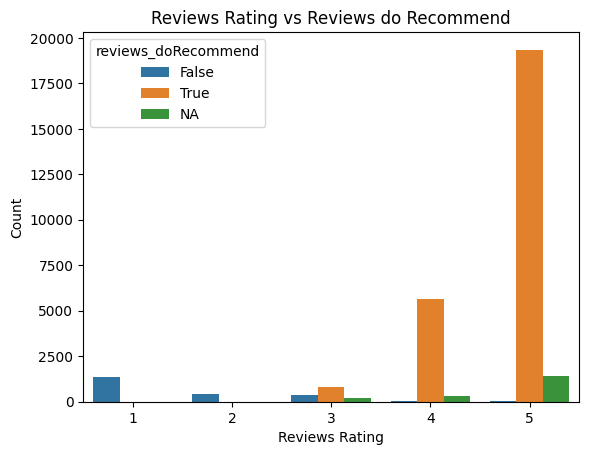

In [ ]:
# From the random sample the review text for low ratings are also negative and thus we will change reviews_doRecommend = False for these records
# set reviews_doRecommend = False for reviews_rating = 1, 2
review_data.loc[(review_data['reviews_rating'].isin([1, 2])), 'reviews_doRecommend'] = False

# Also have a check in the relation between reviews_doRecommend and reviews_rating
sns.countplot(x='reviews_rating', hue='reviews_doRecommend', data=review_data)
plt.title('Reviews Rating vs Reviews do Recommend')
plt.xlabel('Reviews Rating')
plt.ylabel('Count')
plt.show()



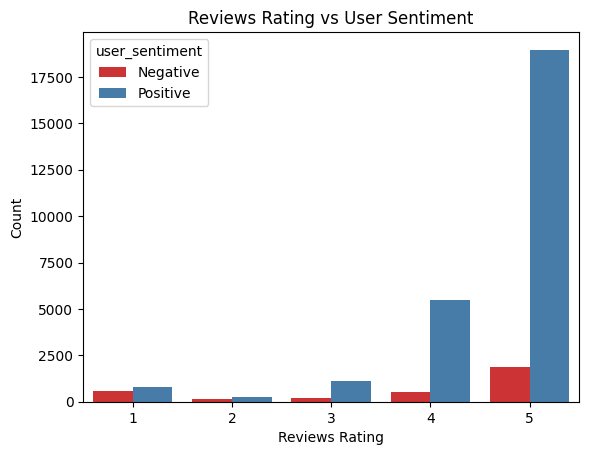

In [ ]:
# Now have alook at the distribution of the reviews_rating and user_sentiment
sns.countplot(x='reviews_rating', hue='user_sentiment', data=review_data, palette='Set1', hue_order=['Negative', 'Positive'])
plt.title('Reviews Rating vs User Sentiment')
plt.xlabel('Reviews Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Get the records where reviews_rating = 5 and user_sentiment = Negative
df = review_data[(review_data['reviews_rating'] .isin([4,5])) & (review_data['user_sentiment'] == 'Negative')][['reviews_rating', 'user_sentiment', 'reviews_text']]
df.shape


(2410, 3)

In [ ]:
# Get the records where reviews_rating = 1 and 2 and user_sentiment = Positive
df1 = review_data[(review_data['reviews_rating'].isin([1, 2])) & (review_data['user_sentiment'] == 'Positive')][['reviews_rating', 'user_sentiment', 'reviews_text']]
df1.shape

(1067, 3)

#### Observation
---
It is highly unlikely that 1860 reviews although rated 5 but showed negative sentiment. And the same applied for 1067 reviews which rated 1 or 2  but showed positive sentiment.

In [ ]:
# Take saple 0f 10 from df and analysze the review text
df.sample(10)




,reviews_rating,user_sentiment,reviews_text
1032,5,Negative,"I only use windex,In fact my husban calls me the windex queen."
24417,4,Negative,A little different twist on the age-old monster story!
14481,5,Negative,i use these daily to wipe my dogs bowls. i have mastiffs and they make a mess. This review was collected as part of a promotion.
26035,5,Negative,First hour kinda slow but the anticipation to see Godzilla is crazy!
1036,5,Negative,I consider myself a ketchup snob. I'll pass on the Hunts or catsup anyday and will only put Heinz on my fries. I suggest you do the same.
12889,5,Negative,Clorox is a staple in household cleaning products. This review was collected as part of a promotion.
12461,5,Negative,cleans and disinfects for to kill of those little buggers This review was collected as part of a promotion.
3518,5,Negative,I've always been a fan of Chex Mix snacks and the muddy buddies are tops.
4980,5,Negative,"My son enjoys this, and it was bought for him. He enjoys it."
15543,5,Negative,Hubs loves this for a snack. Not too bad for you compared to some other chips.


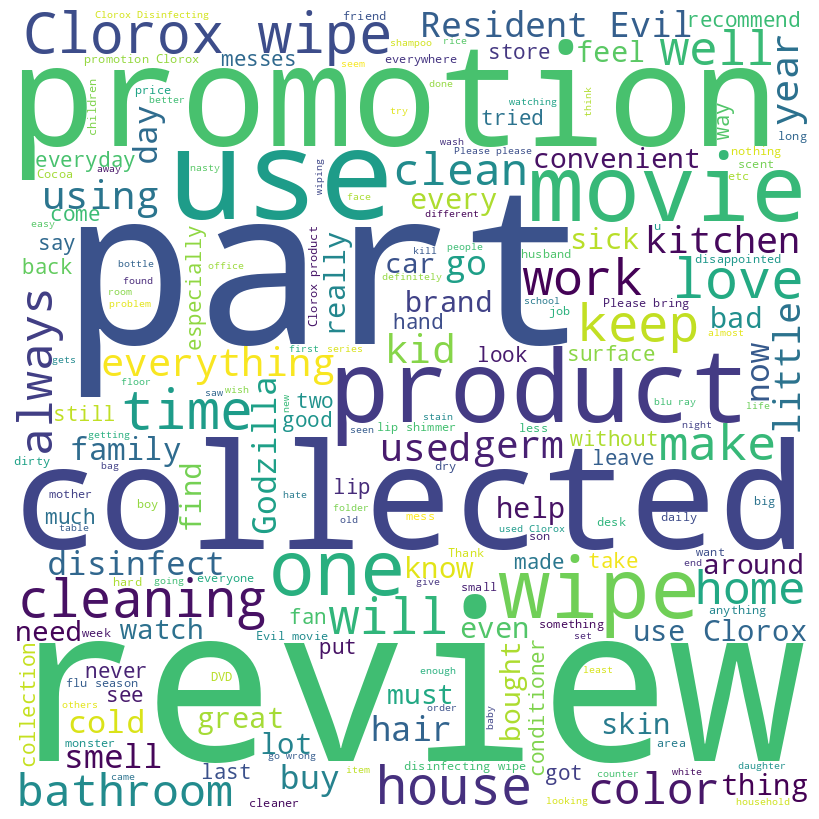

In [ ]:
# Word cloud for the reviews_text
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(df['reviews_text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Observation:
---
From the world it is more evident that sentoment meeds to be cprrected to Positive for rating 4 and 5

In [ ]:
# Change the sentiment to Positive for reviews_rating = 4,5
review_data.loc[(review_data['reviews_rating'].isin([4,5])), 'user_sentiment'] = 'Positive'


In [ ]:
# Get the records where reviews_rating = 5 and user_sentiment = Negative
df = review_data[(review_data['reviews_rating'] .isin([4,5])) & (review_data['user_sentiment'] == 'Negative')][['reviews_rating', 'user_sentiment', 'reviews_text']]
df.shape

(0, 3)

In [ ]:
df1.sample(10)

,reviews_rating,user_sentiment,reviews_text
28844,2,Positive,"I tried out this whole set.i wanted it to work but the scent wasn't favorable and my hair felt really dry, hard and stiff after and I've always been so proud of my soft hair. I tried using this for a week or so but had to stop in fear that I was causing permanent damage to my hair. This review was collected as part of a promotion."
22381,1,Positive,The total care original formula was the best! It was the only shampoo that I would use. It had the best scent and my hair reacted really well with it. I am extremely disappointed with the new formula. It weighed down my hair and I did not like the smell at all. I won't be purchasing this shampoo anymore unless the original total care comes back.!
28854,2,Positive,"Despite using this with the line's hair mask and shampoo, I didn't find much difference in oil control the next day and still felt the need to use dry shampoo. It smells nice and made my hair feel soft, but it just didn't live up to all of its promises, in my opinion. Such a shame too because I love the concept and really wanted this to work for me! I received this product free for testing purposes, but all opinions are my own. This review was collected as part of a promotion."
21505,1,Positive,I loved the old Exxtra Gel. I used it for years and have always feared that I wouldn't be able to find it. It held my hair in place exactly as I desired all day. This new formula has an overwhelming smell. And it holds your hair for about 15 minutes. I may as well put water through my hair. I have read review after review on this new formula which agree with me. Please go back to the original formula. Nexxus has lost my business.
1450,1,Positive,"This shelf made of cardboard. The assemble system is just double stick tape, It should not be more than { $ }dollars. it Just looks so cheap."
4539,2,Positive,Great deal for pretty average movies but Blu-rays look pretty good and I only paid five dollars for five blu rays.
6268,1,Positive,"This recipe for your chill is horrible. You need to revert back to the recipe you used twenty years ago, then it taste great. I will not be buying your chill until a new and improved recipe comes out. And it better be good."
21356,1,Positive,As a 10+ year user I truly am confused why they would change the formula...there is clearly nothing better from feel to scent in the new formula...I now have to search for a new option...given the price point and efficacy of the new formula nexus is no longer a option...hopefully they will bring back the old formula...and I will be back
21546,1,Positive,"Nexxus, why did you change the Exxtra Gel It is a watered down version (seriously...I believe with my whole heart that you added water to the gel) of the older, MUCH BETTER Exxtra Gel. It was perfect for my curly hair, and now I am struggling to find a gel that works as well as the old Exxtra Gel. As other reviewers wrote, the new gel also smells very bad. Did you test this product before changing it"
22492,1,Positive,The new formula is not working. I bought one bottle and will not buy another. The new and improved has done nothing for my hair. It has caused dry scalp and skin irritation. Please bring back the original formula.


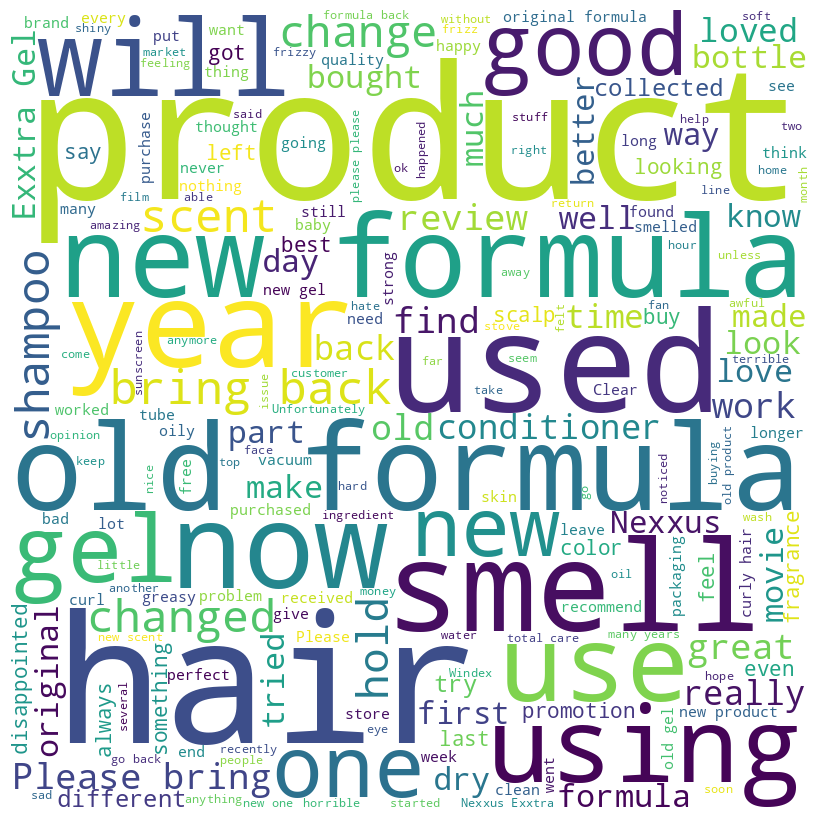

In [ ]:
# Similar action to be taken for reviews_rating = 1,2
# Before have a look  on word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(df1['reviews_text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [ ]:
# Set sentiment = Negative for reviews_rating = 1,2
review_data.loc[(review_data['reviews_rating'].isin([1,2])), 'user_sentiment'] = 'Negative'


In [ ]:
# Get the records where reviews_rating = 1 and 2 and user_sentiment = Positive
df1 = review_data[(review_data['reviews_rating'].isin([1, 2])) & (review_data['user_sentiment'] == 'Positive')][['reviews_rating', 'user_sentiment', 'reviews_text']]
df1.shape


(0, 3)

In [ ]:
review_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,categoriescategory_freq
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NA,NA,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive,movies music booksmusicrbmovies tvmovie bundles collectionscds vinylrap hiphopbassmusic cd vinylraphiphopmainstream rappop rap
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NA,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive,foodpackaged foodssnackscrackerssnacks cookies chipsrice cakescakes
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NA,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,foodpackaged foodssnackscrackerssnacks cookies chipsrice cakescakes
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,NaN,NaN,rebecca,Negative,personal caremedicine cabinetlubricantspermicidehealthsexual wellnesslubricants
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative,personal caremedicine cabinetlubricantspermicidehealthsexual wellnesslubricants


##  2. Data Cleaning
---
Although some of the data cleaning we have performed during EDA lets have a detailed look here

In [ ]:
# Percenatge of null values in the data set
review_data.isnull().sum()/len(review_data)*100

,0
id,0.000000
brand,0.000000
categories,0.000000
manufacturer,0.470000
name,0.000000
reviews_date,0.153333
reviews_didPurchase,0.000000
reviews_doRecommend,0.000000
reviews_rating,0.000000
reviews_text,0.000000


In [ ]:
# With huge number of null values we can drop the columns reviews_userCity and reviews_userProvince
review_data.drop(['reviews_userCity', 'reviews_userProvince'], axis=1, inplace=True)
review_data.isnull().sum()/len(review_data)*100

,0
id,0.000000
brand,0.000000
categories,0.000000
manufacturer,0.470000
name,0.000000
reviews_date,0.153333
reviews_didPurchase,0.000000
reviews_doRecommend,0.000000
reviews_rating,0.000000
reviews_text,0.000000


##  3. Text Preprocessing
---
As part of preprocessing we can do the below operations

1.  lower case
2.  remove noise by performing removal of special characters and punctuations
3.  lemmatization
4.  stop word removal


In [ ]:
# For sentiment analysis we dont need all the columns, so we can drop the columns that are not required
review_data_sentiment = review_data[['id', 'reviews_text', 'user_sentiment', 'reviews_rating', 'reviews_title']]
review_data_sentiment.head()

,id,reviews_text,user_sentiment,reviews_rating,reviews_title
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,5,Just Awesome
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part of a promotion.,Positive,5,Good
2,AV14LG0R-jtxr-f38QfS,Good flavor.,Positive,5,Good
3,AV16khLE-jtxr-f38VFn,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Negative,1,Disappointed
4,AV16khLE-jtxr-f38VFn,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,1,Irritation


In [ ]:
# We see that the reviews_title are not going to add much value to the sentiment analysis, so we can drop the column
review_data_sentiment.drop('reviews_title', axis=1, inplace=True)
review_data_sentiment.head()

,id,reviews_text,user_sentiment,reviews_rating
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,5
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part of a promotion.,Positive,5
2,AV14LG0R-jtxr-f38QfS,Good flavor.,Positive,5
3,AV16khLE-jtxr-f38VFn,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Negative,1
4,AV16khLE-jtxr-f38VFn,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,1


In [ ]:
review_data_sentiment.shape

(30000, 4)

In [ ]:
# Create a function that converts the sentiment to 1 for Positive and 0 for Negative
def sentiment_to_numeric(sentiment):
    if sentiment == 'Positive':
        return 1
    else:
        return 0


In [ ]:
review_data_sentiment['user_sentiment'] = review_data_sentiment['user_sentiment'].apply(sentiment_to_numeric)
review_data_sentiment.head()

,id,reviews_text,user_sentiment,reviews_rating
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,5
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part of a promotion.,1,5
2,AV14LG0R-jtxr-f38QfS,Good flavor.,1,5
3,AV16khLE-jtxr-f38VFn,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",0,1
4,AV16khLE-jtxr-f38VFn,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,1


In [ ]:
# Create a function to lower case the text
def lower_case(text):
    return text.lower()


In [ ]:
# Create a function to Remove the stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
def remove_stop_words(text):
    return " ".join([word for word in text.split() if word not in stop])



In [ ]:
# Create a function to Remove the special characters
def remove_special_characters(text):
    return re.sub(r'[^\w\s]','',text)


In [ ]:
# Create  a function to perform lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet data (if not already downloaded)
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Create a function named as preprocess_text that will call all the above functions
def preprocess_text(text):
    text = lower_case(text)
    text = remove_stop_words(text)
    text = remove_special_characters(text)
    text = lemmatize_text(text)
    return text


In [ ]:
# Call the preprocess_text function on the reviews_text and store the result in a new column reviews_text_processed
review_data_sentiment['reviews_text_processed'] = review_data_sentiment['reviews_text'].apply(preprocess_text)
review_data_sentiment.head()

,id,reviews_text,user_sentiment,reviews_rating,reviews_text_processed
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,5,love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part of a promotion.,1,5,good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Good flavor.,1,5,good flavor
3,AV16khLE-jtxr-f38VFn,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",0,1,read review looking buying one couple lubricant ultimately disappointed even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean up pleasant especially since lacked captivating sensation expecting im disappointed paid much lube use again could use normal personal lubricant 1 less money 2 less mess
4,AV16khLE-jtxr-f38VFn,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,1,husband bought gel u gel caused irritation felt like burning skin recommend gel


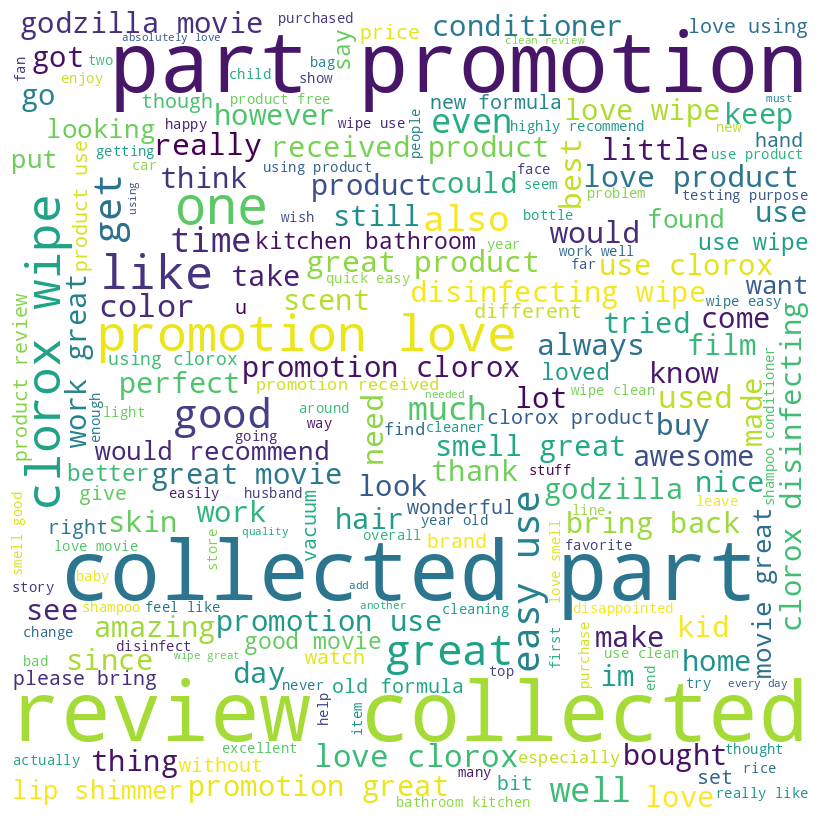

In [ ]:
# Get a word cloud for the reviews_text_processed
stopwords_set = set(stopwords.words('english'))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_set,
                min_font_size = 10).generate(' '.join(review_data_sentiment['reviews_text_processed']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Create bigrams on the reviews_text_processed
from nltk.util import ngrams

ngrams_list = []
for text in review_data_sentiment['reviews_text_processed']:
    ngrams_list.append(list(ngrams(text.split(), 2)))

In [ ]:
# Get the top 10 bigrams
bigrams = [bigram for sublist in ngrams_list for bigram in sublist]
bigrams_freq = pd.Series(bigrams).value_counts().head(20)
bigrams_freq

,count
"(part, promotion)",8743
"(review, collected)",8743
"(collected, part)",8743
"(clorox, wipe)",1989
"(easy, use)",1278
"(love, clorox)",905
"(great, product)",803
"(love, product)",789
"(disinfecting, wipe)",688
"(great, movie)",654


## 4.   Feature Extraction
---

In [ ]:
# Our data set review_data_sentiment is ready for sentiment analysis. We will create a classification model and that can only work on numerical data.
# We use spacy to convert the text to numerical data


import spacy

# Install the spaCy model with word embeddings
!python -m spacy download en_core_web_md



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 53.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load the spaCy model with word embeddings
nlp = spacy.load("en_core_web_md")

In [ ]:
# Process each review text and get the vector of each review text
review_vectors = [nlp(text).vector for text in review_data_sentiment['reviews_text_processed']]

In [ ]:
# Add the review vectors to the data frame
review_data_sentiment['review_vectors'] = review_vectors
review_data_sentiment.head(2)

,id,reviews_text,user_sentiment,reviews_rating,reviews_text_processed,review_vectors
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,5,love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy,"[0.29218793, 1.7194191, -0.9184526, -1.4609263, 0.65299153, 0.18658528, 1.8159469, 2.402642, -2.2862217, -0.41546828, 3.5901988, -0.50498223, -2.578839, 2.223684, 2.0211487, -1.2446983, 1.5117178, 0.13886301, -0.7471027, 1.1658047, 0.7257464, 2.004652, 0.5646058, -4.2226233, -0.045086753, 0.2649779, -2.097475, -0.8973248, 1.5572288, 1.1328189, -0.5707443, -0.22474156, -0.7973661, -2.0683334, 0.888921, 0.623459, -0.82223165, 1.2460144, 1.5495114, -0.17795344, 0.18850194, -0.6931217, 1.9146954, 0.16178629, 0.052982155, 2.0370207, -1.1997463, -1.822263, 0.60559684, 1.1829306, 0.3253537, -0.15426995, -1.1322373, -1.3674288, -0.6007438, -0.24866845, 1.5909164, 0.9501405, 2.0746996, 2.2399247, 3.7304628, -0.052541405, -0.105914794, -1.6966842, -0.07713629, 1.7373146, -3.0790882, -3.4128997, -0.49217576, 2.7310133, -1.8445802, -0.5299341, 0.49053946, -1.5566478, -0.25454214, 3.7523756, -1.0431769, 0.5328401, -0.6391447, 0.9473322, -2.0700238, 0.17819376, 2.049072, -1.6601, 1.2056664, 1.5130593, 2.3388932, -2.103076, -1.6425327, 0.35075685, -1.7007496, 2.2009594, -0.6521618, -2.2292488, 1.1559151, -1.8820825, 2.1406803, -2.7917137, 0.39649737, -1.6014242, ...]"
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part of a promotion.,1,5,good flavor review collected part promotion,"[-0.88077664, -2.4998915, -0.9158817, 0.47458836, 3.5790331, -0.5640316, 1.8699783, 1.8628569, -2.6720898, -0.10801498, 6.076691, 0.9999333, -3.8747349, 1.7456499, 0.3006233, 0.9480233, 3.3804665, 1.344535, -0.36585832, -0.29862, -2.3475132, 0.97949004, -2.3229167, 0.7539234, -1.01349, 0.56727, -4.0504336, 0.5484833, -0.5752017, 2.5446117, 1.6560999, 0.23072667, -1.31413, 0.08681667, 0.674045, 0.047966678, 0.42961335, 0.78353167, 0.38998333, -0.011346619, 0.65515, 0.87357503, -0.875565, 0.92868, -0.82905, 1.8016995, 4.48885, -2.023496, -0.1226717, 0.22819965, 0.5055917, 1.5052484, 0.15478934, -2.6491668, -1.1404499, -0.59748, -3.1344998, 1.0314797, 2.5168536, -1.3269367, 2.0466883, 0.13032335, -0.13890165, -0.66133666, 2.2055, 3.3643665, -1.8134289, -4.15198, 1.5926933, 2.0920134, -0.29271835, -0.059021685, -1.4062166, -1.85785, 0.08663497, 1.8719101, -1.2117265, 1.8640116, 0.12950169, 1.0341634, -3.06726, 0.53747165, -0.11186666, -0.31058833, 0.25544664, 0.31441835, 0.09841999, -2.3198583, 0.2469217, 0.18561001, -0.32984495, 1.9576501, 1.7582649, -3.752885, 1.2234733, -0.58965343, 1.06767, -2.6132183, -0.31249663, 0.39788005, ...]"


In [ ]:
# Export the DataFrame to an Excel file for future use without need to generate the embedding once more
review_data_sentiment.to_excel('/content/drive/MyDrive/Recommendation System Project/vectorized_reviews.xlsx', index=False)

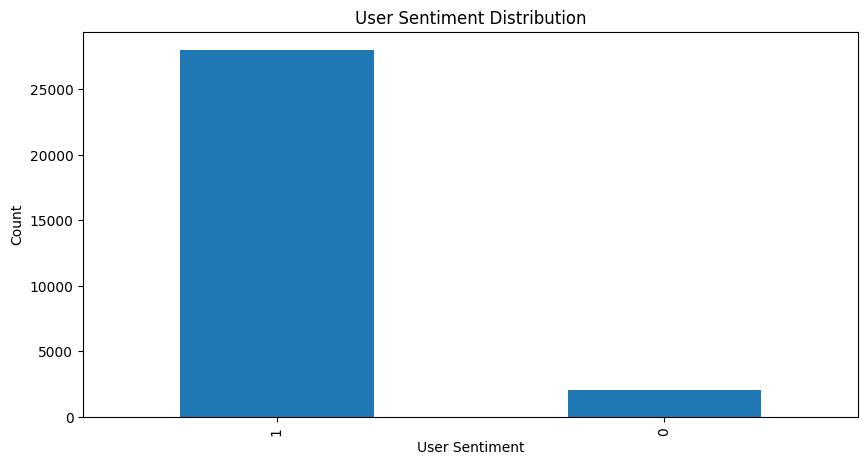

In [ ]:
# We have seen it earkier, lets have another look at the distribution of the user_sentiment
review_data_sentiment['user_sentiment'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('User Sentiment Distribution')
plt.xlabel('User Sentiment')
plt.ylabel('Count')
plt.show()

We can see a clear and significant clas imbalance problem here as the number of postive sentiments are too high in the data set. This will eventually indulge biases while creating a classification model. So we have to treat the class imbalance issue.

#### Performing Train Test Split


In [ ]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split


X = np.array(review_data_sentiment['review_vectors'].to_list())
y = np.array(review_data_sentiment['user_sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Shape of the training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (24000, 300)
X_test shape: (6000, 300)
y_train shape: (24000,)
y_test shape: (6000,)


#### Now handle class imbalance handling using SMOTE

In [ ]:
!pip install imbalanced-learn

In [ ]:
# class imbalance handling using SMOTE oversampling


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Shape of the training and testing data
print(f"X_train_res shape: {X_train_res.shape}")
print(f"y_train_res shape: {y_train_res.shape}")



X_train_res shape: (44712, 300)
y_train_res shape: (44712,)


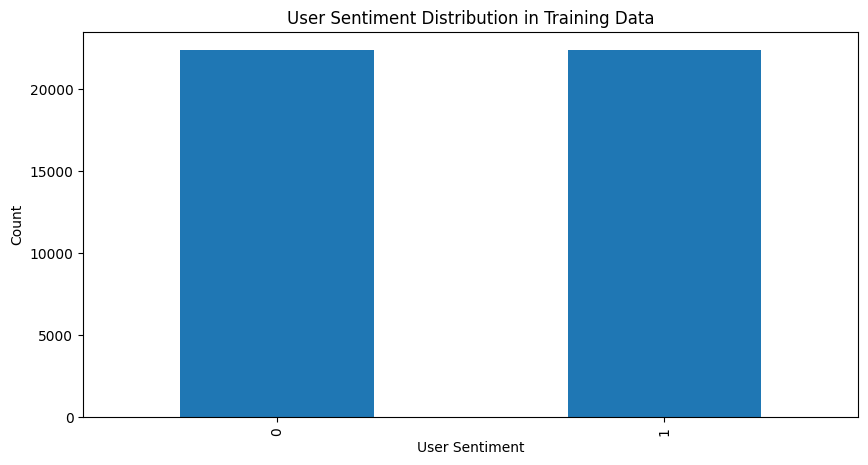

In [ ]:
# Value counts of the user_sentiment in the training data
pd.Series(y_train_res).value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('User Sentiment Distribution in Training Data')
plt.xlabel('User Sentiment')
plt.ylabel('Count')
plt.show()

### Thats perfect!! we have controlled the class imbalance problem through over samping mechanism

###  5. Training a text classification model:
---
We will build  below three models
1. Logistic regression
2. Random forest
3. XGBoost

In [ ]:
# Model building for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score


In [ ]:
# Create a function to evaluate different classification models
def evaluate_model(model,  X_test, y_test):

    # Predict the test data
    y_pred = model.predict(X_test)

    # Calculate and Print the accuracy score
    accuracy_score_value = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy_score_value}")

    # Calculate and Print the classification report
    classification_report_value = classification_report(y_test, y_pred)
    print(f"Classification Report: \n{classification_report_value}")

    # Calculate and Print the confusion matrix
    confusion_matrix_value = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix: \n{confusion_matrix_value.tolist()}")

    # Plot the confusion matrix
    sns.heatmap(confusion_matrix_value, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show


    # Calculate and Print the ROC AUC score
    roc_auc_score_value = roc_auc_score(y_test, y_pred)
    print(f"ROC AUC Score: {roc_auc_score_value}")

    # Calculate and Print the Precision score
    precision_score_value = precision_score(y_test, y_pred)
    print(f"Precision Score: {precision_score_value}")

    # Calculate and Print the Recall score
    recall_score_value = recall_score(y_test, y_pred)
    print(f"Recall Score: {recall_score_value}")

    # Calculate and Print the F1 score
    f1_score_value = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1_score_value}")

    # Return the ebaluation metrics in a list

    evaluation_metrics = {
                          'Accuracy': accuracy_score_value,
                          'Classification Report': classification_report_value,
                          'Confusion Matrix': confusion_matrix_value,
                          'ROC AUC Score': roc_auc_score_value,
                          'Precision Score': precision_score_value,
                          'Recall Score': recall_score_value,
                          'F1 Score': f1_score_value,
                          'model': model
                          }





    return evaluation_metrics



In [ ]:
# Create a logistic regression model

logistic_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

Accuracy: 0.8828333333333334
Classification Report: 
              precision    recall  f1-score   support

           0       0.33      0.83      0.47       380
           1       0.99      0.89      0.93      5620

    accuracy                           0.88      6000
   macro avg       0.66      0.86      0.70      6000
weighted avg       0.95      0.88      0.90      6000

Confusion Matrix: 
[[315, 65], [638, 4982]]
ROC AUC Score: 0.8577121183742273
Precision Score: 0.9871210620170399
Recall Score: 0.8864768683274021
F1 Score: 0.934095809505953


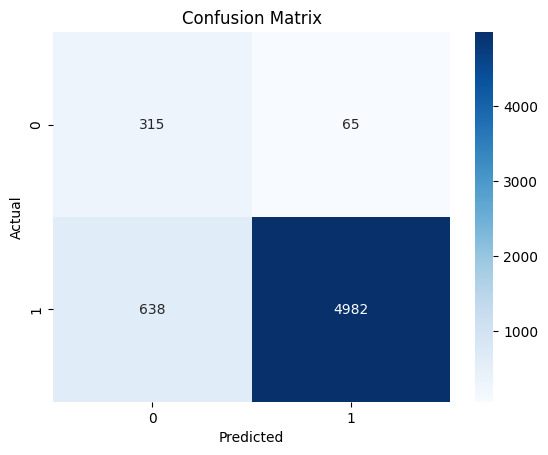

In [ ]:
# Evaluate the model
logistic_model_perf = evaluate_model(logistic_model, X_test, y_test)

In [ ]:
# Model building for Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a base Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

Accuracy: 0.9536666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.56      0.61       380
           1       0.97      0.98      0.98      5620

    accuracy                           0.95      6000
   macro avg       0.81      0.77      0.79      6000
weighted avg       0.95      0.95      0.95      6000

Confusion Matrix: 
[[213, 167], [111, 5509]]
ROC AUC Score: 0.7703877130548792
Precision Score: 0.9705778717406625
Recall Score: 0.9802491103202847
F1 Score: 0.9753895184135978


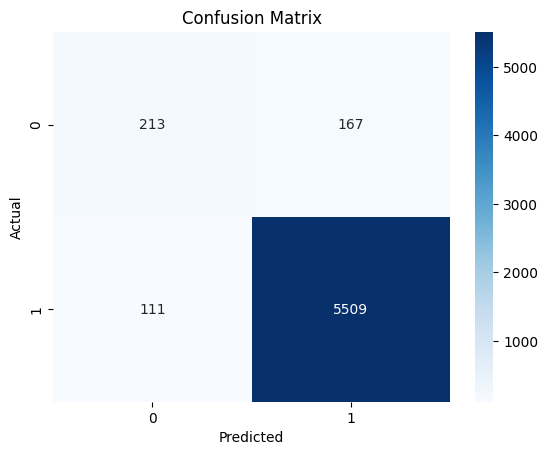

In [ ]:
# Evaluate model performance
random_forest_model_perf = evaluate_model(random_forest_model, X_test, y_test)

In [ ]:
# Hyper parameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],


}





In [ ]:
# Import random search
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Create a random search object
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = random_forest_model, param_distributions = param_grid,
                                   n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)

In [ ]:
%time
# Fit the grid search object to the data, since we have retrieved the best params one, commenting out for next runs. Else it takes a lot of timne
# random_search.fit(X_train_res, y_train_res)




CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [ ]:
# Get the best hyperparameters
#random_search.best_params_


#### Best parameters for random forest after RandomSearch CV
`{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'entropy',
 'bootstrap': False}`

In [ ]:
# Use the best hyperparameters to create the final model

random_forest_model_final = RandomForestClassifier(n_estimators = 200,
                                                   min_samples_split = 2,
                                                   min_samples_leaf = 1,
                                                   max_features = 'sqrt',
                                                   max_depth = 30,
                                                   criterion = 'entropy',
                                                   bootstrap = False,
                                                   random_state=42)

random_forest_model_final.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       n_estimators=200, random_state=42)

In [ ]:
# Now build a random forest with the best params, this is commented as we dont want to run the CV random search every time

# random_forest_model_final = RandomForestClassifier(**random_search.best_params_, random_state=42)
# random_forest_model_final.fit(X_train_res, y_train_res)


Accuracy: 0.9586666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       380
           1       0.97      0.99      0.98      5620

    accuracy                           0.96      6000
   macro avg       0.85      0.77      0.81      6000
weighted avg       0.96      0.96      0.96      6000

Confusion Matrix: 
[[214, 166], [82, 5538]]
ROC AUC Score: 0.7742835737029405
Precision Score: 0.9708976157082749
Recall Score: 0.9854092526690391
F1 Score: 0.9780996114447191


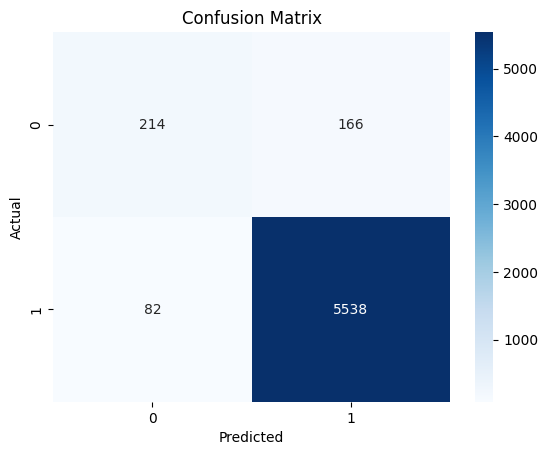

In [ ]:
# Evaluate model performance
random_forest_model_final_perf = evaluate_model(random_forest_model_final, X_test, y_test)

#### `XGBoost`

In [ ]:
# Create a XGBoost model

from xgboost import XGBClassifier

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)


In [ ]:

# Fit the model on the training data
xgb_model.fit(X_train_res, y_train_res)



Accuracy: 0.9531666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       380
           1       0.98      0.97      0.97      5620

    accuracy                           0.95      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.95      0.95      0.95      6000

Confusion Matrix: 
[[241, 139], [142, 5478]]
ROC AUC Score: 0.8044718112005993
Precision Score: 0.9752536941427808
Recall Score: 0.9747330960854093
F1 Score: 0.9749933256207173


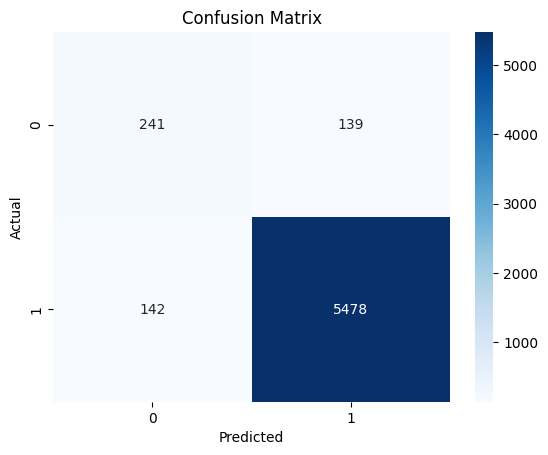

In [ ]:
# Evaluate the model
xgb_model_perf = evaluate_model(xgb_model, X_test, y_test)

#### Tries with hyper parameter tuning but that takes too much of time, hence this notebook does not cover the hyperparameter tuning of the XGBoost model.

In [ ]:
# reate a dataframe with the output of each model


# Create a dictionary to store the model performance metrics
model_performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'Random Forest (Tuned)', 'XGBoost'],
    'Accuracy': [logistic_model_perf['Accuracy'], random_forest_model_perf['Accuracy'], random_forest_model_final_perf['Accuracy'], xgb_model_perf['Accuracy']],
    'Precision': [logistic_model_perf['Precision Score'], random_forest_model_perf['Precision Score'], random_forest_model_final_perf['Precision Score'], xgb_model_perf['Precision Score']],
    'Recall': [logistic_model_perf['Recall Score'], random_forest_model_perf['Recall Score'], random_forest_model_final_perf['Recall Score'], xgb_model_perf['Recall Score']],
    'F1_Score': [logistic_model_perf['F1 Score'], random_forest_model_perf['F1 Score'], random_forest_model_final_perf['F1 Score'], xgb_model_perf['F1 Score']],
    'ROC_AUC': [logistic_model_perf['ROC AUC Score'], random_forest_model_perf['ROC AUC Score'], random_forest_model_final_perf['ROC AUC Score'], xgb_model_perf['ROC AUC Score']]
}

# Create a pandas DataFrame from the dictionary
model_df = pd.DataFrame(model_performance)

# Display the DataFrame
model_df

,Model,Accuracy,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression,0.882833,0.987121,0.886477,0.934096,0.857712
1,Random Forest,0.953667,0.970578,0.980249,0.975390,0.770388
2,Random Forest (Tuned),0.958667,0.970898,0.985409,0.978100,0.774284
3,XGBoost,0.953167,0.975254,0.974733,0.974993,0.804472


### Considering the above table we see XGBoost is better as it shows better F1 score, ROC_AUC and accuracy
#### We will now dump the XGboost model weights using pickl

In [ ]:
#  Use pickl to dump the model weights for XGboost

import pickle


# Save the model to a file
with open('/content/drive/MyDrive/Recommendation System Project/Pickle/xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)



##  6. Recommendation System

We build the below two recommendation system
1. User-based recommendation system

2. Item-based recommendation system

In [ ]:
# Data import
review_reco = pd.read_csv('/content/drive/MyDrive/Recommendation System Project/sample30.csv')
review_reco.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [ ]:
# We do not need all the columns
# We can continue with id,reviews_username,reviews_rating
review_reco = review_reco[['id','reviews_username','reviews_rating']]
review_reco.head()

,id,reviews_username,reviews_rating
0,AV13O1A8GV-KLJ3akUyj,joshua,5
1,AV14LG0R-jtxr-f38QfS,dorothy w,5
2,AV14LG0R-jtxr-f38QfS,dorothy w,5
3,AV16khLE-jtxr-f38VFn,rebecca,1
4,AV16khLE-jtxr-f38VFn,walker557,1


In [ ]:
# Lets have a look if there any null values in review_reco

review_reco.isnull().sum()

,0
id,0
reviews_username,63
reviews_rating,0


In [ ]:
# We see there are 63 rows where there is no reviews_username, lets cgeck the distribution of id where reviews_username is null
review_reco[review_reco['reviews_username'].isnull()]['id'].value_counts()

,count
id,
AVpf3VOfilAPnD_xjpun,20
AVpe9W4D1cnluZ0-avf0,13
AVpfPPkEilAPnD_xX3cP,11
AVpe38Uy1cnluZ0-YuJR,3
AVpe-ltS1cnluZ0-bL8w,2
AVpfNfEMLJeJML434uf-,2
AVpe_y-I1cnluZ0-bmvh,2
AVpe_N91LJeJML43z4jD,1
AVpe6C3WLJeJML43yApY,1


In [ ]:
# Divide the data into train test split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(review_reco, test_size=0.2, random_state=42)


In [ ]:
train_data.shape, test_data.shape

((24000, 3), (6000, 3))

In [ ]:
# Create a pivot of the training dataset where index will be each user and column will be the product, and each cell represents the rating
train_data_pivot = train_data.pivot_table(index='reviews_username', columns='id', values='reviews_rating', fill_value=0)
train_data_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
